In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm 
import numpy as np
from scipy import stats
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
import math
import sklearn
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn import tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
from scipy import stats
from scipy.special import boxcox, inv_boxcox
from sklearn.model_selection import StratifiedKFold
from scipy.stats import norm
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
file=pd.read_csv("Insurance_Marketing-Customer-Value-Analysis (1).csv")

In [3]:
file.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [31]:
file.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle', 'loc_state'],
      dtype='object')

In [29]:
file.shape

(9134, 26)

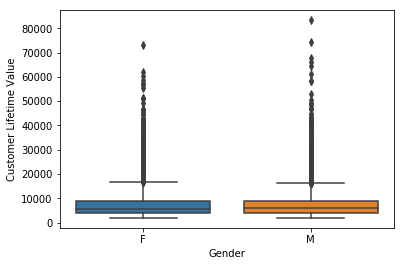

In [4]:
ax = sns.boxplot(x = 'Gender', y = 'Customer Lifetime Value', data = file)

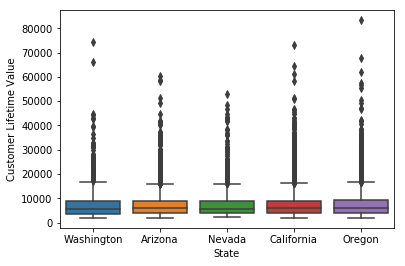

In [32]:
ax = sns.boxplot(x = 'State', y = 'Customer Lifetime Value', data = file)

In [4]:
file.isna().any()

Customer                         False
State                            False
Customer Lifetime Value          False
Response                         False
Coverage                         False
Education                        False
Effective To Date                False
EmploymentStatus                 False
Gender                           False
Income                           False
Location Code                    False
Marital Status                   False
Monthly Premium Auto             False
Months Since Last Claim          False
Months Since Policy Inception    False
Number of Open Complaints        False
Number of Policies               False
Policy Type                      False
Policy                           False
Renew Offer Type                 False
Sales Channel                    False
Total Claim Amount               False
Vehicle Class                    False
Vehicle Size                     False
dtype: bool

In [5]:
file.isnull().any()

Customer                         False
State                            False
Customer Lifetime Value          False
Response                         False
Coverage                         False
Education                        False
Effective To Date                False
EmploymentStatus                 False
Gender                           False
Income                           False
Location Code                    False
Marital Status                   False
Monthly Premium Auto             False
Months Since Last Claim          False
Months Since Policy Inception    False
Number of Open Complaints        False
Number of Policies               False
Policy Type                      False
Policy                           False
Renew Offer Type                 False
Sales Channel                    False
Total Claim Amount               False
Vehicle Class                    False
Vehicle Size                     False
dtype: bool

In [7]:
corrmat = file.corr()
corrmat

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


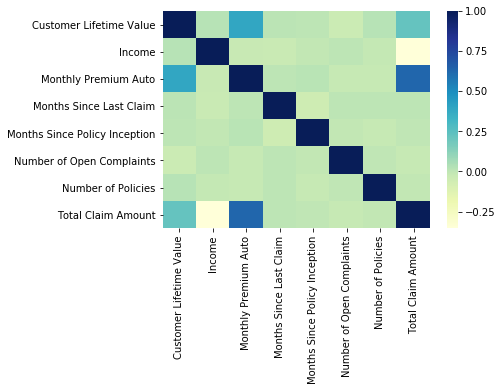

In [8]:
sns.heatmap(corrmat, cmap ="YlGnBu") 

In [7]:
df=file[["Customer Lifetime Value","Gender"]]

In [30]:
male=df[df["Gender"]=="M"]
female=df[df["Gender"]=="F"]

In [9]:
stats.ttest_ind(male["Customer Lifetime Value"],female["Customer Lifetime Value"])

Ttest_indResult(statistic=-1.300686352501256, pvalue=0.19339865630769232)

In [10]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

In [11]:
stats.f_oneway(file[file["Education"]=="Bachelor"]["Customer Lifetime Value"],file[file["Education"]=="College"]["Customer Lifetime Value"],file[file["Education"]=="Master"]["Customer Lifetime Value"],file[file["Education"]=="High School or Below"]["Customer Lifetime Value"],file[file["Education"]=="Doctor"]["Customer Lifetime Value"])

F_onewayResult(statistic=2.422865348052191, pvalue=0.04603615409468821)

In [12]:
stats.ttest_ind(file[file["Response"]=="No"]["Customer Lifetime Value"],file[file["Response"]=="Yes"]["Customer Lifetime Value"])

Ttest_indResult(statistic=0.8533582829612565, pvalue=0.393483030479461)

In [13]:
stats.f_oneway(file[file["Coverage"]=="Basic"]["Customer Lifetime Value"],file[file["Coverage"]=="Extended"]["Customer Lifetime Value"],file[file["Coverage"]=="Premium"]["Customer Lifetime Value"])

F_onewayResult(statistic=133.67511419504908, pvalue=6.0158970099807e-58)

In [14]:
stats.f_oneway(file[file["Renew Offer Type"]=="Offer1"]["Customer Lifetime Value"],file[file["Renew Offer Type"]=="Offer2"]["Customer Lifetime Value"],file[file["Renew Offer Type"]=="Offer3"]["Customer Lifetime Value"],file[file["Renew Offer Type"]=="Offer4"]["Customer Lifetime Value"])

F_onewayResult(statistic=25.83261444494041, pvalue=1.238399930571374e-16)

In [15]:
file["loc_state"]=file["State"]+" "+file["Location Code"]
file["loc_state"].unique()

array(['Washington Suburban', 'Arizona Suburban', 'Nevada Suburban',
       'California Suburban', 'Washington Rural', 'Oregon Rural',
       'Oregon Suburban', 'Arizona Urban', 'Oregon Urban',
       'California Urban', 'Washington Urban', 'Nevada Urban',
       'Arizona Rural', 'Nevada Rural', 'California Rural'], dtype=object)

In [16]:
stats.f_oneway(file[file["loc_state"]=="Washington Suburban"]["Customer Lifetime Value"],
file[file["loc_state"]=="Arizona Suburban"]["Customer Lifetime Value"],
file[file["loc_state"]=="Nevada Suburban"]["Customer Lifetime Value"],
file[file["loc_state"]=="California Suburban"]["Customer Lifetime Value"],
file[file["loc_state"]=="Washington Rural"]["Customer Lifetime Value"],
file[file["loc_state"]=="Oregon Rural"]["Customer Lifetime Value"],
file[file["loc_state"]=="Oregon Suburban"]["Customer Lifetime Value"],
file[file["loc_state"]=="Arizona Urban"]["Customer Lifetime Value"],
file[file["loc_state"]=="Oregon Urban"]["Customer Lifetime Value"],
file[file["loc_state"]=="Washington Urban"]["Customer Lifetime Value"],
file[file["loc_state"]=="Nevada Urban"]["Customer Lifetime Value"],
file[file["loc_state"]=="Arizona Rural"]["Customer Lifetime Value"],
file[file["loc_state"]=="Nevada Rural"]["Customer Lifetime Value"],
file[file["loc_state"]=="California Rural"]["Customer Lifetime Value"],
file[file["loc_state"]=="California Urban"]["Customer Lifetime Value"])

F_onewayResult(statistic=0.6545779584547949, pvalue=0.8203036999367664)

In [17]:
stats.f_oneway(file[file["State"]=="Washington"]["Customer Lifetime Value"],
file[file["State"]=="Arizona"]["Customer Lifetime Value"],
file[file["State"]=="Nevada"]["Customer Lifetime Value"],
file[file["State"]=="California"]["Customer Lifetime Value"],
file[file["State"]=="Oregon"]["Customer Lifetime Value"])

F_onewayResult(statistic=0.27289285462119284, pvalue=0.8955985932127517)

In [18]:
stats.ttest_ind(file[file["Location Code"]=="Urban"]["Customer Lifetime Value"],file[file["Location Code"]=="Suburban"]["Customer Lifetime Value"])

Ttest_indResult(statistic=0.303191661007535, pvalue=0.7617523740882791)

In [19]:
stats.ttest_ind(file[file["Location Code"]=="Rural"]["Customer Lifetime Value"],file[file["Location Code"]=="Suburban"]["Customer Lifetime Value"])

Ttest_indResult(statistic=-0.2717878755836119, pvalue=0.7857925596350388)

In [20]:
stats.ttest_ind(file[file["Location Code"]=="Urban"]["Customer Lifetime Value"],file[file["Location Code"]=="Rural"]["Customer Lifetime Value"])

Ttest_indResult(statistic=0.47586536102067967, pvalue=0.6342013031203569)

In [21]:
#frame=file.groupby("Location Code")
#frame.get_group('Rural')

In [35]:
x=file.drop(["Location Code","State","Response","Gender","Vehicle Class","Vehicle Size","Sales Channel","Policy Type"],axis=1)

In [36]:
x.head()

,Customer,Customer Lifetime Value,Coverage,Education,Effective To Date,EmploymentStatus,Income,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy,Renew Offer Type,Total Claim Amount,Vehicle,loc_state
0,BU79786,2763.519279,Basic,Bachelor,2/24/2011,Employed,56274,Married,69,32,5,0,1,Corporate L3,Offer1,384.811147,Two-Door Car Medsize,Washington Suburban
1,QZ44356,6979.535903,Extended,Bachelor,1/31/2011,Unemployed,0,Single,94,13,42,0,8,Personal L3,Offer3,1131.464935,Four-Door Car Medsize,Arizona Suburban
2,AI49188,12887.431650,Premium,Bachelor,2/19/2011,Employed,48767,Married,108,18,38,0,2,Personal L3,Offer1,566.472247,Two-Door Car Medsize,Nevada Suburban
3,WW63253,7645.861827,Basic,Bachelor,1/20/2011,Unemployed,0,Married,106,18,65,0,7,Corporate L2,Offer1,529.881344,SUV Medsize,California Suburban
4,HB64268,2813.692575,Basic,Bachelor,2/3/2011,Employed,43836,Single,73,12,44,0,1,Personal L1,Offer1,138.130879,Four-Door Car Medsize,Washington Rural


In [37]:
from openpyxl import load_workbook
from pandas import Series,ExcelWriter

In [38]:
x.to_excel("final.xlsx",sheet_name="Sheet1")

In [39]:
file["Policy"].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [40]:
x1=file[file["Policy"]=="Corporate L3"]
x2=file[file["Policy"]=="Personal L3"]
x3=file[file["Policy"]=="Special L3"]

In [41]:
L3=pd.concat([x1, x2, x3], axis=0)

In [42]:
x1=file[file["Policy"]=="Corporate L2"]
x2=file[file["Policy"]=="Personal L2"]
x3=file[file["Policy"]=="Special L2"]
L2=pd.concat([x1, x2, x3], axis=0)

In [43]:
x1=file[file["Policy"]=="Corporate L1"]
x2=file[file["Policy"]=="Personal L1"]
x3=file[file["Policy"]=="Special L1"]
L1=pd.concat([x1, x2, x3], axis=0)

In [44]:
stats.f_oneway(L1["Customer Lifetime Value"],L2["Customer Lifetime Value"],L3["Customer Lifetime Value"])

F_onewayResult(statistic=0.23065710916978394, pvalue=0.7940163049337391)

In [45]:
means=[file[file["Coverage"]=="Basic"]["Customer Lifetime Value"].mean(),file[file["Coverage"]=="Premium"]["Customer Lifetime Value"].mean(),file[file["Coverage"]=="Extended"]["Customer Lifetime Value"].mean()]

In [46]:
#plt.plot(file["Renew Offer Type"],means)
#plt.show()
means

[7190.706421887397, 10895.60308275364, 8789.677608050313]

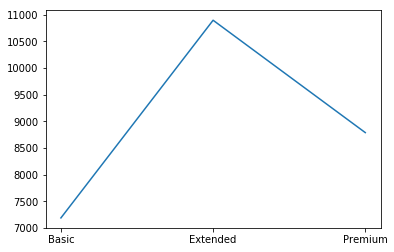

In [47]:
plt.plot(file["Coverage"].unique(),means)
plt.show()

In [50]:
file["EmploymentStatus"].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [51]:
stats.f_oneway(file[file["EmploymentStatus"]=="Employed"]["Customer Lifetime Value"],file[file["EmploymentStatus"]=="Unemployed"]["Customer Lifetime Value"],file[file["EmploymentStatus"]=="Medical Leave"]["Customer Lifetime Value"],file[file["EmploymentStatus"]=="Disabled"]["Customer Lifetime Value"],file[file["EmploymentStatus"]=="Retired"]["Customer Lifetime Value"])

F_onewayResult(statistic=3.809808710328605, pvalue=0.00425058662383102)

In [62]:
file["Policy"].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [63]:
means=[file[file["Policy"]=="Corporate L3"]["Customer Lifetime Value"].mean(),file[file["Policy"]=="Personal L3"]["Customer Lifetime Value"].mean(),file[file["Policy"]=="Special L3"]["Customer Lifetime Value"].mean(),file[file["Policy"]=="Corporate L2"]["Customer Lifetime Value"].mean(),file[file["Policy"]=="Personal L2"]["Customer Lifetime Value"].mean(),file[file["Policy"]=="Special L2"]["Customer Lifetime Value"].mean(),file[file["Policy"]=="Corporate L1"]["Customer Lifetime Value"].mean(),file[file["Policy"]=="Personal L1"]["Customer Lifetime Value"].mean(),file[file["Policy"]=="Special L1"]["Customer Lifetime Value"].mean()]

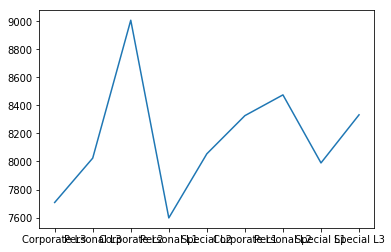

In [71]:
plt.plot(file["Policy"].unique(),means)

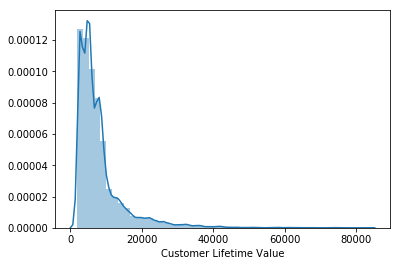

In [34]:
sns.distplot(file['Customer Lifetime Value'])

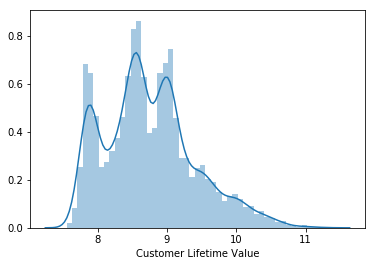

In [35]:
sns.distplot(np.log(file['Customer Lifetime Value']))

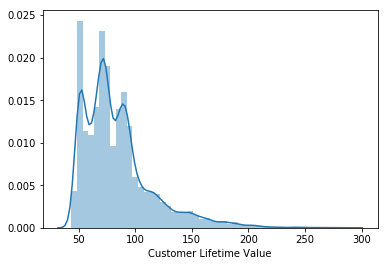

In [36]:
sns.distplot(np.sqrt(file['Customer Lifetime Value']))

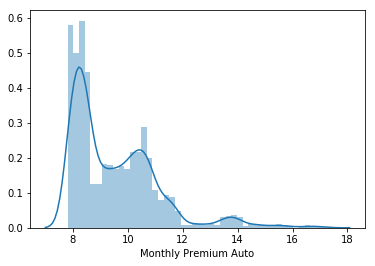

In [38]:
sns.distplot(np.sqrt(file['Monthly Premium Auto']))

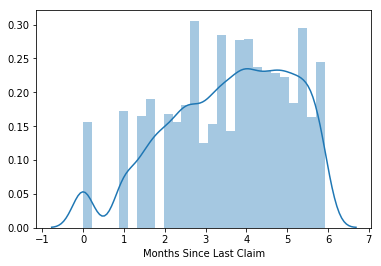

In [39]:
sns.distplot(np.sqrt(file['Months Since Last Claim']))

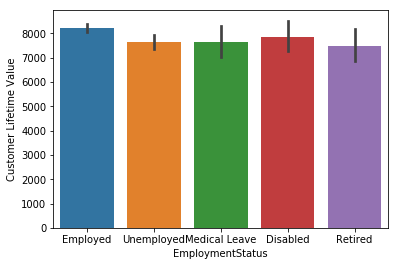

In [44]:
 sns.barplot(x="EmploymentStatus", y="Customer Lifetime Value", data=file)

In [23]:
y=pd.cut(file['Customer Lifetime Value'],15,labels=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'])
c=file.columns[1]
d=list(file.columns[3:])
d.append(c)
X=file[d]

In [24]:
# Categorical boolean mask
categorical_feature_mask = X.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = X.columns[categorical_feature_mask].tolist()

In [25]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [26]:
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))
X=X[categorical_cols]

C:\Users\shreya\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


Feature ranking:
1. feature 3 (0.137224)
2. feature 11 (0.080518)
3. feature 2 (0.079878)
4. feature 9 (0.076448)
5. feature 14 (0.072592)
6. feature 15 (0.064511)
7. feature 12 (0.061166)
8. feature 10 (0.060338)
9. feature 16 (0.053822)
10. feature 1 (0.051426)
11. feature 7 (0.049680)
12. feature 4 (0.043501)
13. feature 6 (0.042398)
14. feature 5 (0.040070)
15. feature 8 (0.031486)
16. feature 13 (0.030447)
17. feature 0 (0.024495)


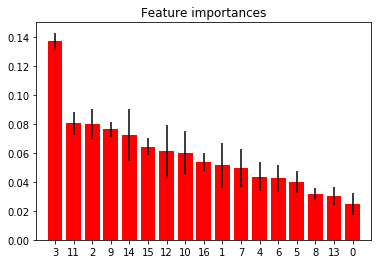

In [28]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [45]:
data=pd.read_csv('file2.csv')

In [46]:
data=data.drop(['Unnamed: 0','Customer'],axis=1)

In [47]:
new_data = data[data.columns]
new_data=new_data.drop(['Customer Lifetime Value'],axis=1)
X = new_data
y = data['Customer Lifetime Value']

In [48]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y ,test_size=0.2)
X_train.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,CLV Compl,category_Basic,category_Extended,...,category_California Urban,category_Nevada Rural,category_Nevada Suburban,category_Nevada Urban,category_Oregon Rural,category_Oregon Suburban,category_Oregon Urban,category_Washington Rural,category_Washington Suburban,category_Washington Urban
7199,80101,79,16,8,0,3,442.916700,3192.645530,0,1,...,0,0,0,0,0,0,0,0,1,0
2961,66023,70,11,94,0,1,265.629611,4974.085486,1,0,...,0,0,0,0,0,0,1,0,0,0
9052,17533,73,10,1,0,1,350.400000,359.920066,1,0,...,0,0,0,0,0,0,0,0,0,0
7016,59183,113,11,91,0,5,542.400000,40683.653994,1,0,...,0,0,1,0,0,0,0,0,0,0
2564,56481,106,7,17,0,3,273.250112,4896.994821,1,0,...,0,0,0,1,0,0,0,0,0,0


In [49]:
train_data,fitted_lambda = stats.boxcox(X_train['Monthly Premium Auto'])
X_train['Monthly Premium Auto'] = train_data
# use lambda value to transform test data
test_data = stats.boxcox(X_test['Monthly Premium Auto'], fitted_lambda)
X_test['Monthly Premium Auto']=test_data

C:\Users\shreya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\shreya\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [50]:
y_train_new= np.log(y_train)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn import tree, linear_model
from sklearn.model_selection import StratifiedKFold

regr = linear_model.LinearRegression()
selector1 = RFECV(regr, step=1, cv=5,n_jobs =-1,scoring="r2",verbose = 2)
#start_time = timer(None)
selector1.fit(X_train, y_train_new)
#timer(start_time)
selected1 = X_train.columns[selector1.support_]
trainSelected = X_train[selected1]
testSelected = X_test[selected1]
regr.fit(trainSelected, y_train_new)
y_pred = np.exp(regr.predict(testSelected))
print("R2 Score :",r2_score(y_pred,y_test))
print("mean_absolute_percentage_error :",mean_absolute_percentage_error(y_test, predictions))

R2 Score : -5.938401850982463
mean_absolute_percentage_error : 0.09657146697459476


In [59]:
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
selector1 = RFECV(xgb, step=1, cv=5,n_jobs =-1,scoring="r2",verbose = 2)
#start_time = timer(None)
selector1.fit(X_train, y_train_new)
#timer(start_time)
selected1 = X_train.columns[selector1.support_]
trainSelected = X_train[selected1]
testSelected = X_test[selected1]

xgb.fit(trainSelected,y_train_new)
predictions = np.exp(xgb.predict(testSelected))
print("Explained_variance_score :",explained_variance_score(predictions,y_test))
print("R2 Score :",r2_score(y_test, predictions))
print("mean_absolute_percentage_error :",mean_absolute_percentage_error(y_test, predictions))

Fitting estimator with 70 features.
[21:00:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting estimator with 69 features.
[21:00:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting estimator with 68 features.
[21:00:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting estimator with 67 features.
[21:00:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting estimator with 66 features.
[21:00:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting estimator with 65 features.
[21:00:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:00:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in

C:\Users\shreya\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:00:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Explained_variance_score : 0.4732071028312822
R2 Score : 0.6929716458226849
mean_absolute_percentage_error : 0.09657146697459476


In [60]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
selector1 = RFECV(regressor, step=1, cv=5,n_jobs =-1,scoring="r2",verbose = 2)
#start_time = timer(None)
selector1.fit(X_train, y_train_new)
#timer(start_time)
selected1 = X_train.columns[selector1.support_]
print(selected1)
trainSelected = X_train[selected1]
testSelected = X_test[selected1]
regressor.fit(trainSelected, y_train_new)
y_pred_final = np.exp(regressor.predict(testSelected))
r2_score(y_pred_final,y_test)

Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 fe

0.5468496518215213

In [51]:
regr = linear_model.ElasticNet(random_state=0)
regr.fit(X_train,y_train_new)

ElasticNet(random_state=0)

In [52]:
y_e_pred=np.exp(regr.predict(X_test))
r2_score(y_test,y_e_pred)

0.024082942799114382

In [53]:
ridge_reg=linear_model.Ridge(random_state=0)
ridge_reg.fit(X_train,y_train_new)

Ridge(random_state=0)

In [54]:
y_test_pred = np.exp(ridge_reg.predict(X_test))
r2_score(y_test,y_test_pred)

0.1281647768514479